# This Jupyter notebook contains the instructions for Assessment 2019 for the module Fundamentals of Data Analysis 2019

### GMIT H.Dip Data Analytics - Academic Year 2019 - 2020


#### See README for more background info.


##### Student: Henk Tjalsma


##### GMIT email address: 

G00376321@gmit.ie

## Problem statement

> This assessment concerns the well-known tips [6] dataset and the Python [1] packages seaborn [5] and jupyter [4]. The project is broken into three parts, as follows:

Description:

* Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment.
* Within the repository, create a jupyter [4] notebook that uses descriptive statistics and plots to describe the tips [6] dataset. 

Regression:

* To the above jupyter notebook add a section that discusses and analyses whether there is a relationship between the total bill and tip amount.

Analyse:

* Again using the same notebook, analyse the relationship between the variables within the dataset. You are free to interpret this as you wish — for example, you may analyse all pairs of variables, or select a subset and analyse those.

## Tips Dataset - what does it contain?

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule. [16]


#### Tipping in the USA Explained

Below I included a youtube link I came across about Tipping in the USA. [37]

__[Tipping in the USA Explained - Visit America](http://https://www.youtube.com/watch?v=RoKL2T_48HU)__

Here are some typical tipping amounts in the US:
    
    Sit Down Restaurant Staff: 15% to 20%. 
    
    Bartenders: 15% to 20% or $1-$2 per drink if paying cash. 

    Taxis: 5%-10%. 

    Hotel cleaning staff $2-$5 per day. 

Let's see if our Tips Dataset, which is based on American research, meets the tips percentage of waitering staff and the total bill, 15% to 20%.


![Tipping](Tipping.png)


##### Columns:

> total_bill : Total bill (cost of the meal), including tax, in US dollars

> tip : Tip (gratuity) in US dollars

> sex : Sex of person paying for the meal (0=male, 1=female)

> smoker : Smoker in party? (0=No, 1=Yes)

> day : 3=Thur, 4=Fri, 5=Sat, 6=Sun

> time : The time of the observation, whether at lunch or dinner etc.

> size : The size of the group whether there were multiple members (between 1 and 6)

The Tips dataset is also integrated with the Seaborn package, an external Python package for data visualisation. However in this assessment I have downloaded it already, and imported it manually.

## Setting up the Environment for Jupyter notebook

#####  Importing the libraries

In [1]:
# Import libraries
# Pandas for managing datasets
import pandas as pd
import numpy as np

# Matplotlib for additional customization
import matplotlib.pyplot as plt

# making sure matplotlib plays nicely with jupyter notebook, with this magic command here
%matplotlib inline 

# Seaborn for plotting and styling
import seaborn as sns

##### Loading the data set through pandas

In [2]:
# Loading the .csv file into a Pandas DataFrame
# Instead of calling it df for dataframe, called it tips

tips = pd.read_csv('tips.csv', delimiter = ',')

##### What does the data set, the csv file look like?

In [3]:
# Showing content csv file
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Each entry or row captures a type of customer (be it male or female or smoker or non-smoker ) having either dinner or lunch on a particular day of the week. It also captures the amount of total bill, the tip given and the table size of a customer. [20]

##### Integrity Check Tips Dataset

It is always good practice to check the data integrity, whether there are any empty cells or corrupted data. You can use for this the Pandas function info(). The function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. [35]

It checks if there is any null value in any column. This function also checks the data type for each column, as well as number of each data types and number of observations.

Another function I came across, is the isnull() function. It can check for missing values (isnull method) in the Tips Dataset, as well.

And finally the DataFrame.shape, i.e. tips.shape, returns a tuple representing the dimensionality of the DataFrame (number of rows and columns).

In [4]:
# The summary includes list of all columns with their data types and the number of non-null values in each column
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
# Checking missing values (isnull method) in the tips dataset
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
# Get the shape of the dataset - number of rows and columns
tips.shape

(244, 7)

## Different Plots - Univariate vs Bivariate Plots

I would like to bring to attention that in this Assessment I will be using several different plotting techniques, some will just show the one variable, others multiple variables. 

* In task 1 I will show some examples of Univariate plots. Univariate means "one variable" (one type of data). [36]

So these plots are based on a single variable and show the frequency of unique values of a given variable.

We can do lots of things with univariate data:

    Find a central value using mean, median and mode.
    Find how spread out it is using range, quartiles and standard deviation.
    Make plots like Bar Graphs, Pie Charts and Histograms.


* In the tasks 2 and 3 of the assessment I will show examples Bivariate plots. Bivariate means "two variables", in other words there are two types of data.

These type of plots are used when you need to find a relation between two variables and how the value of one variable changes the value of another variable. 

So with bivariate data we are interested in comparing the two sets of data and finding any relationships.

We can use Tables, Scatter Plots, Correlation, Line of Best Fit, and plain old common sense.

## 1. Description:

* Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment.

* Within the repository, create a jupyter [4] notebook that uses descriptive statistics and plots to describe the tips [6] dataset. 

## In below sections some descriptive statistics of this Tips dataset and some examples plots to describe it further.

##### Describing first 5 columns csv file - the raw data

In [7]:
# Describing first 5 columns
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The tips.head command showed us that for this tips data set, the columns sex, smoker, day and time are categorical data. And total_bill, tip, and size are numerical data. [17]

##### Describe the data (numbers) in the dataset

The describe command allowed us to retrieve some common information such as min, max, unique and count for given numerical data.

In [8]:
# Describe the data (numbers) in the dataset
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


* The above are a few statistics that give some perspective on the nature of the distribution of the data [18]:
    - mean is the average and is the "expected" value of the distribution. On average, you'd expect to get this number.
    - std -> standard deviation -> it’s a measure of how far away from the mean values you’re typically are -> standard deviation is giving you sort of an indication of the spread away from the mean that those values are.    
    - 50% -> median, that is the value for which half of the values are above it, and half of them are below it.
    - 25% & 75% give perspective on the kurtosis. Also, all percentile numbers are generally more robust to outliers. 25% -> is the value for which 25% of the values in your data set, for the variable, are below that. 75% -> is the one for which 75% of the values in your data set, for the variable, are below it.
    - min, max, max - min, 75% - 25% are all alternatives to perspectives on how big of swings the data takes relative to the mean.
    - count, the larger this number, the more credibility all the stats have.    

### Seaborn's plotting functions

One of Seaborn's greatest strengths is its diversity of plotting functions. For instance, making a scatter plot is just one line of code using the lmplot() function. [38]

There are two ways you can do so:

* The first way (recommended) is to pass your DataFrame to the data= argument, while passing column names to the axes arguments, x= and y=.

* The second way is to directly pass in Series of data to the axes arguments.

As I have provided some descriptive statistics already, I will now show a few examples of plots and describe the Tips dataset further.

#####  Histogram - Total Bill variable

Histograms allow you to plot the distributions of numeric variables. I find them ones of the easiest plots to describe and interpret any dataset.

In below Distribution Plot (a.k.a. Histogram) example, there is just the total bill amount.

The “total_bill” variable appears skewed in nature and most of the bill values are in the range of 10 - 20 dollars.

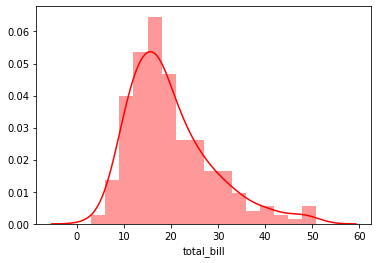

In [9]:
# Binsize is calculated using square-root of row count
sns.distplot(tips["total_bill"], bins=16, color="red")

The sns.distplot() above combines the histogram & plots the estimated probability density function over the data. The calculation of bin size is automatic here. 

It is applicable on numerical columns only as it creates histogram along with the plot of kernel density estimation. [26]

If you increase the number of bins, the more accurate the result will be.

##### Histogram - Size of the Group while visiting the Restaurant

Below another Distribution Plot that shows for most visits to the restaurant, the size of the group was just 2 people. Followed by 3 and 4.

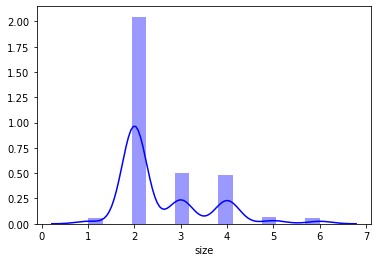

In [10]:
sns.distplot(tips["size"], bins=16, color="blue")

##### Density Plot - Tip

KDE or kernel density or simply, density plot visualizes the distribution of data over a continuous interval or time period. The peaks of a Density Plot displays where exactly the values are concentrated over the interval. [28]

In below example, we see that most of the tips are between the range of 2 and 4.

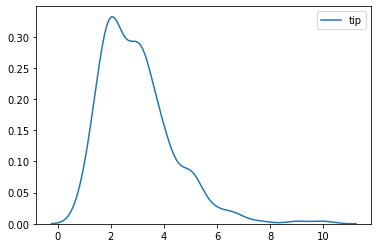

In [11]:
# Density Plot
sns.kdeplot(tips['tip'])

##### Density Plot - Total Bill amount vs Tip

Density plots can also display the distribution between two variables.

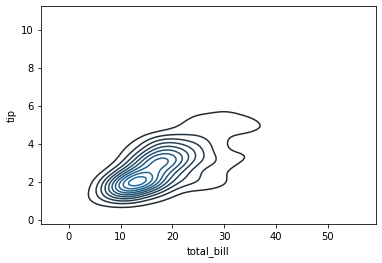

In [12]:
# Density Plot
sns.kdeplot(tips.total_bill, tips.tip)

##### Bar Plot -  smokers versus non-smokers

Bar plots can help you visualize the distributions of categorical variables.

Let's see what the distribution is of smokers versus non-smokers among all the customers. For this purpose, we will use seaborn.countplot() function.

As you can see we have over 150 customers who don't smoke, while the rest does smoke ~90.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text xticklabel objects>)

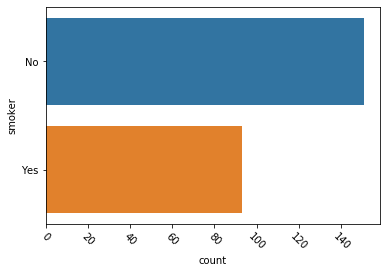

In [13]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(y='smoker', data=tips)

# Rotate x-labels
plt.xticks(rotation=-45)

##### Bar Plot - Smokers and non-smokers for each day Friday till Sunday

Relatively a huge percentage of non-smokers goes to the restaurant on Sunday compared to smokers. The same for Thursday. On Saturday this is more even, while on Friday there are more smokers.

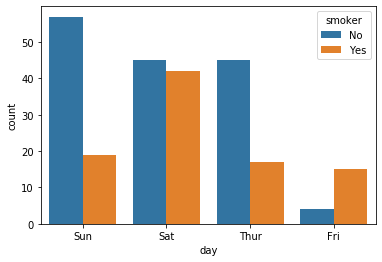

In [14]:
# Smokers or not?
sns.countplot(x='day', hue='smoker' , data=tips)

## 2. Regression:

* To the jupyter notebook add a section that discusses and analyses whether there is a relationship between the total bill and tip amount.

Before I describe Regression, and in my case Linear Regression, I want to show a few more Seaborn plotting functions, but mainly to show the relationship between the total bill and tip amount. Also I would like to show a Heatmap - Correlation Matrix.

In [15]:
# Checking missing values (isnull method) in the tips dataset
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

The above we already executed previously. This indicates that we have no missing tip values. So it seems all customers who were in this restaurant on each of those days Thursday till Sunday, left a tip amount when paying for the bill.

###  2.1 Seaborn plotting functions

So I will show a few plots here, but mainly to cross reference total bill and tip amount (Bivariate plots).

##### Relational Plot - total bill & the tip amount

This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. The kind parameter selects the underlying axes-level function to use [39]:

    scatterplot() (with kind="scatter"; the default)
    lineplot() (with kind="line")

The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters. These parameters control what visual semantics are used to identify the different subsets. It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. Using redundant semantics (i.e. both hue and style for the same variable) can be helpful for making graphics more accessible.

In [16]:
sns.set(style="ticks")

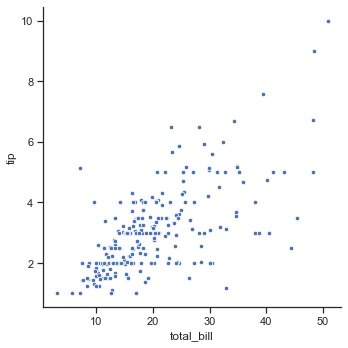

In [17]:
sns.relplot(x="total_bill" , y="tip", data=tips, s=20)

Based on the above scatterplot there appears to be a high concentration of tip data points around 10-20 bill amount, but the exact detail is missing. A lot of data points overlap each other. In below jointplot, it gives us a much better picture. 

##### Joint Distribution Plot - total bill & the tip amount

Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

Normally the tip amount in any restaurant is dependant on the total bill/bill size.

    Jointplot :: kind =”hex”

The bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. Also known as Hexbin Plots.

Now, in the plot image below, it is showing hexagons. The dark colour of the hexagons suggest high density of the data-points where the lighter colour signifies the lesser points.

We can see that if total bill is between 10–20 than the tip will be slightly below 2 dollars and up to 3-4 dollars.

The values that can be put into the kind parameter of the jointplot are as follows:

    kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }

For example:

sns.jointplot(x = tips["total_bill"], y = tips["tip"],kind = "kde", color="purple") # contour plot

A Contour plot (sometimes called Level Plots) are a way to show a three-dimensional surface on a two-dimensional plane. It graphs two predictor variables X Y on the y-axis and a response variable Z as contours.

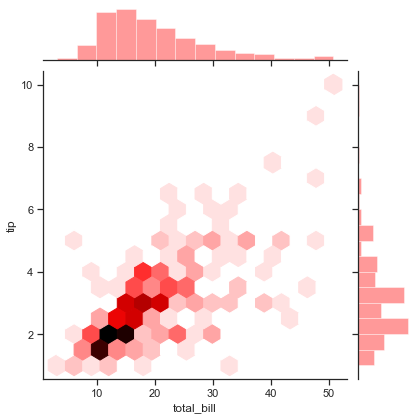

In [18]:
# In below the very dark region is the highest concentration
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'hex', color="red")

### 2.2 Plotting Correlation Matrix

This a very interesting concept. The next plot shows you correlatations between the different variables of the dataset so the column values.

Heatmaps help you visualize matrix-like data.

It's just an example, I describe it more indepth in part 3. For data scientists, checking correlations is an important part of the exploratory data analysis process. This analysis is one of the methods used to decide which features affect the target variable the most, and in turn, get used in predicting this target variable. In other words, it’s a commonly-used method for feature selection in machine learning. [20]


<div class="alert alert-block alert-info">
<b>Note:</b> One important thing to note when plotting a correlation matrix is that it completely ignores any non-numeric column. 
</div>

In [19]:
# Calculate correlations
corr = tips.corr()

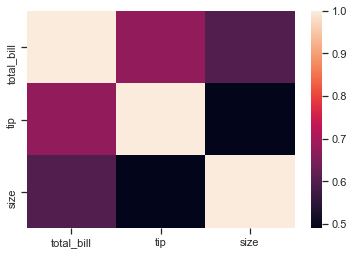

In [20]:
# Heatmap
sns.heatmap(corr)

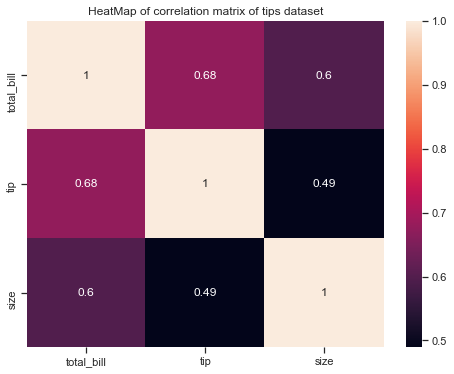

In [21]:
# Basic correlation matrix data frame - using the annotation argument
# Hitting bug - matplotlib/seaborn: first and last row cut in half of heatmap plot [see references 22 and 23]
# Downgrade the package to 3.1.0 (matplotlib broke heatmaps)
plt.subplots(figsize=(8,6))
plt.title("HeatMap of correlation matrix of tips dataset")
sns.heatmap(tips.corr(), annot=True)

While there is obviously a direct relationship between total_bill vs total_bill, tip vs tip, etc, all showing 1, below variables also show Correlation.

Variables With High Correlation:

    total_bill and tip -> 0.68

Evidence there is a relationship between total bill paid and tip amount given.

### 2.3 Linear Regression

And finally I want to touch on Linear Regression as well.

Linear Regression is a very simple supervised machine learning algorithm – we have data (X , Y) with linear relationship. We want to predict unknown Y vales for given X. X can be one or more parameters. [30]

Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, regplot() and lmplot() are closely related, and share much of their core functionality. It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for particular job.

In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression, see below. [42]


<div class="alert alert-block alert-info">
<b>Note:</b> I added an Appendix to this Assessment. It's a follow up in regards to Linear Regression, and Correlation Matrix plot. 
</div>

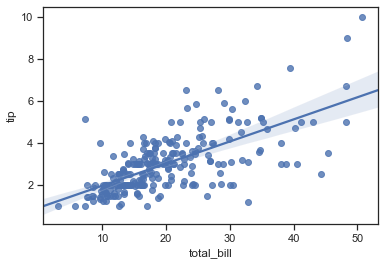

In [22]:
sns.regplot(x="total_bill", y="tip", data=tips)

# Better plot size
sns.set(rc={'figure.figsize':(12,4)})

The above plot seem to show a linear relationship between the two variables, total_bill and tip.

##### But we can predict for example as well, how much tip the waiter will earn based on other parameters. Will it be 15% - 20% of the total bill which is normally the standard? Or will it be higher in this restaurant?

In [23]:
# What is the hardest day to work? (based on number of tables been served) - 244 rows
tips.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


In [24]:
# What is the best day to work – maximum tips (sum and percents)?
tips.groupby('day').sum() # sum per day

,total_bill,tip,size
day,,,
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216
Thur,1096.33,171.83,152


In [25]:
tips_perc=tips.groupby('day').sum() # sum per day

In [26]:
tips_perc.drop('size',inplace=True,axis=1) # sum of size column is not relevant

In [27]:
tips_perc['percent'] = tips_perc['tip']/tips_perc['total_bill']*100 # add percents

In [28]:
tips_perc

,total_bill,tip,percent
day,,,
Fri,325.88,51.96,15.944519
Sat,1778.40,260.40,14.642375
Sun,1627.16,247.39,15.203791
Thur,1096.33,171.83,15.673201


So Saturday is the busiest day, 87 visits followed by Sunday (76), Thursday (62), and finally Friday, only 19 tables served. Friday is much quieter, still the tip amount is around 15% of the bill, for those 4 days. For Friday it's almost 16% (15.944519). Also the amount of people visiting on Friday is much lower, so a chance for waiters to provide customers with a more intimate restaurant experience. And that can influence the tip amount given, however for this dataset that doesn't seem to be the case, on the day itself.

However I also verified if smaller tables are better to serve meaning just the single customer, see further below, and yes in those situations, the percentage tip based on total bill amount is significantly higher.

In [29]:
# Who eats more (and tips more)? Smokers or non smokers?
tips.groupby('smoker').sum()

,total_bill,tip,size
smoker,,,
No,2897.43,451.77,403
Yes,1930.34,279.81,224


In [30]:
tips_smoke=tips.groupby('smoker').sum()

In [31]:
tips_smoke['percent'] = tips_smoke['tip']/tips_smoke['total_bill']*100

In [32]:
tips_smoke

,total_bill,tip,size,percent
smoker,,,,
No,2897.43,451.77,403,15.592094
Yes,1930.34,279.81,224,14.495374


Tip given by non-smokers is higher.

In [33]:
# Lets group total_bill, tip, by day and table size
tips.groupby(['day','size']).sum()

total_bill     tip
day  size                    
Fri  1           8.58    1.92
     2         261.15   42.31
     3          15.98    3.00
     4          40.17    4.73
Sat  1          10.32    2.00
     2         892.37  133.43
     3         459.17   68.36
     4         388.39   53.61
     5          28.15    3.00
Sun  2         684.84  109.86
     3         332.76   46.81
     4         480.39   73.58
     5          81.00   12.14
     6          48.17    5.00
Thur 1          10.07    1.83
     2         727.53  117.24
     3          76.64   10.77
     4         149.75   21.09
     5          41.19    5.00
     6          91.15   15.90

In [34]:
tips_day_size= tips.groupby(['day','size']).sum()

In [35]:
tips_day_size['percent'] = tips_day_size['tip']/tips_day_size['total_bill']*100

In [36]:
tips_day_size.dropna() # drop null rows

total_bill     tip    percent
day  size                               
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
Sun  2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774

From above we can conclude that smaller tables are better to serve. The percentage tip amount is higher (in general).

## 3. Analysis:

* Again using the same notebook, analyse the relationship between the variables within the dataset. You are free to interpret this as you wish — for example, you may analyse all pairs of variables, or select a subset and analyse those.

### 3.1 Seaborn plotting functions

##### Relational plot - Relation between tip and total bill for each gender, smoker and size

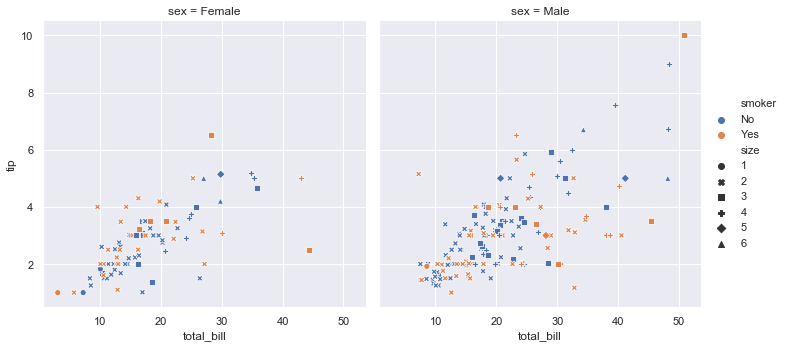

In [37]:
# Relation between tip and total bill for each gender, smoker and size.
sns.relplot(x="total_bill", y="tip", col="sex", hue="smoker", style="size", data=tips)

As you can see in above plot, you can include many different variables from the dataset, but often it's not clear and you cannot draw immediate conclusions. It simply has too many variables. The best is to concentrate on just a few.

In task 2 Regression section, I plotted below:

sns.relplot(x="total_bill" , y="tip", data=tips, s=20)

... let's continue with this and simplify above. See below.

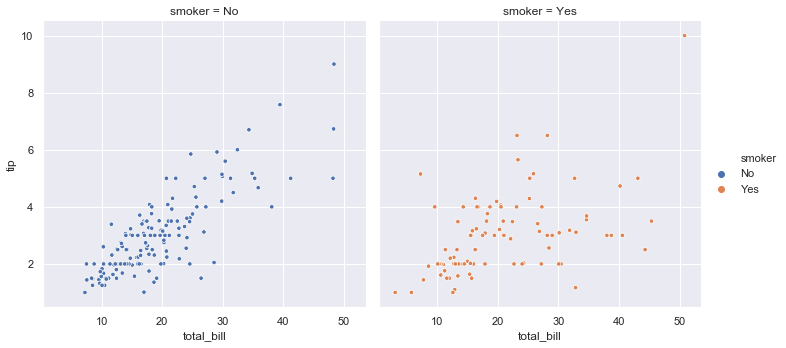

In [38]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="smoker", data=tips, s=20)

Let's break it up per day now, smoker (yes or no), per day (Friday till Sunday).

Compare it the Bar Plot in task 1 - Smokers and non-smokers for each day Friday till Sunday

You can draw the exact same conclusions, relatively a huge percentage of non-smokers goes to the restaurant on Sunday compared to smokers. The same for Thursday. On Saturday this is more even, while on Friday there are more smokers. 

That said I find the bar plot much easier to understand. Due to the fact the dataset only has 244 data points, below plot is still manageable, but it would be different if the dataset had thousands of records.

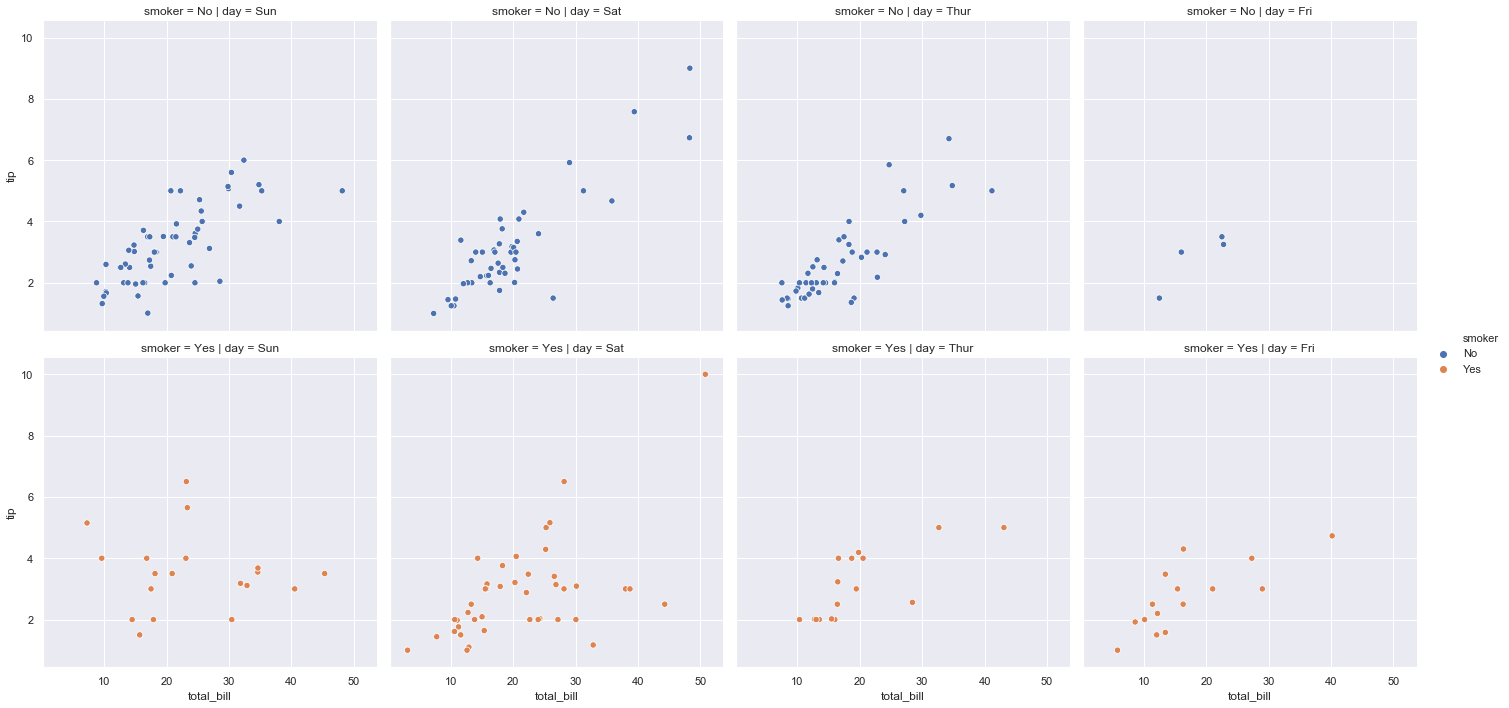

In [39]:
sns.relplot(x="total_bill", y="tip", col="day", row="smoker", hue="smoker", marker='o', data=tips, s=40)

##### Categorical plot - Relationship Sex and Tip (and Day)

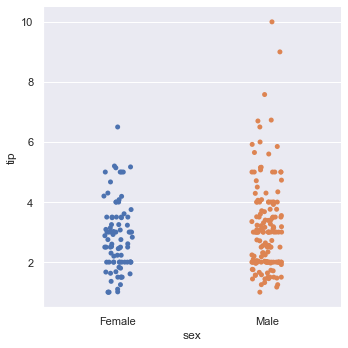

In [40]:
# Categorical data types - Scatterplot
sns.catplot(x="sex", y="tip", data=tips);

In above plot, we can see that most of the tips are concentrated between 2 and 4 irrespective of the gender.
However concentration data points males seems higher.

Different types of scatterplots can be made using attribute kind in seaborn.

The third variable can be used using attribute hue in seaborn. See below.

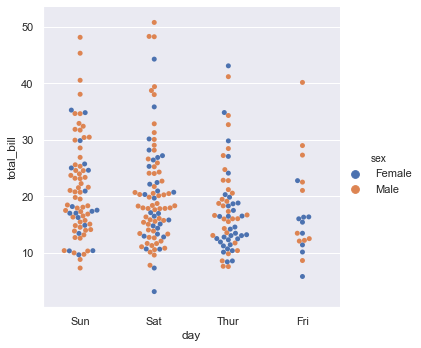

In [41]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

In above two categorical plots, it shows the relationship between a numerical and one or more categorical variables in the data.

You can see high percentage data points men against total bill on Saturday and Sunday. For the other 2 days, Thursday for example the percentage seems higher for women, more blue datapoints. And for Friday it looks more like 50/50.

But when running below bar plots, the picture is much easier to understand. 

* Tip Amount for Males is more than Females.

* And for all 4 weekdays, the total bill for men is higher than women.

##### Barplot - Total Tip Amount vs Sex

Barplots are meant for plotting categorical columns vs numerical columns. It creates bar in visualisation. 

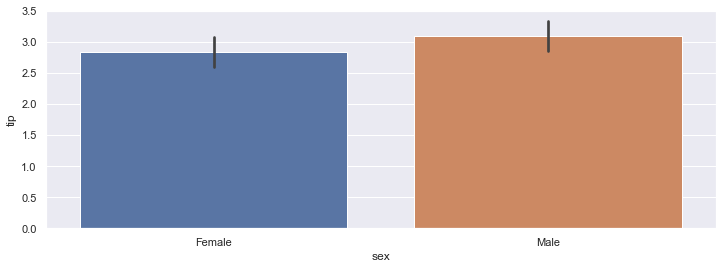

In [42]:
# Barplot
# Inference - Total Tip Amount for Males is more than Females.

sns.barplot(x ="sex" , y ="tip" , data=tips)

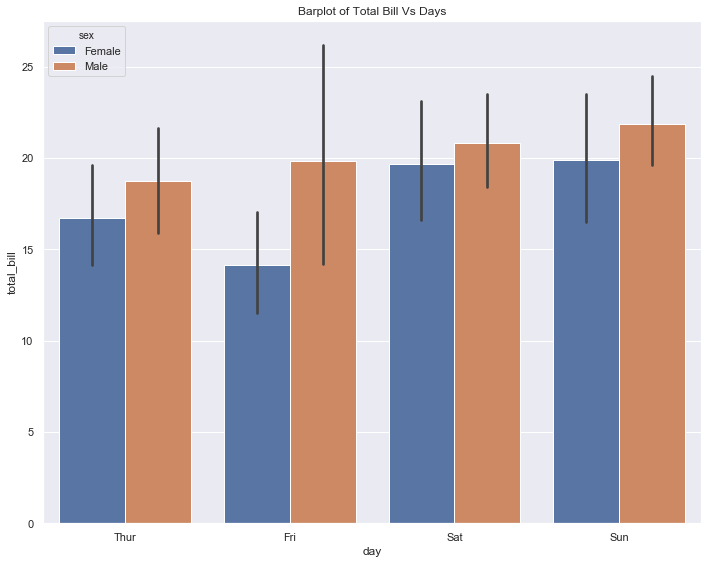

In [43]:
plt.figure(figsize=(10,8))
sns.barplot(tips.day, tips.total_bill, order=["Thur", "Fri", "Sat", "Sun"], hue=tips.sex)
plt.title("Barplot of Total Bill Vs Days")

plt.tight_layout()
plt.show()

##### Barplot - Smoker versus Total Bill

In below barplot I plotted Smoker versus Total Bill. The purpose is to find out if Smokers pay more bill than Non Smokers.

And yes that seems to be the case, more bill for Smokers.

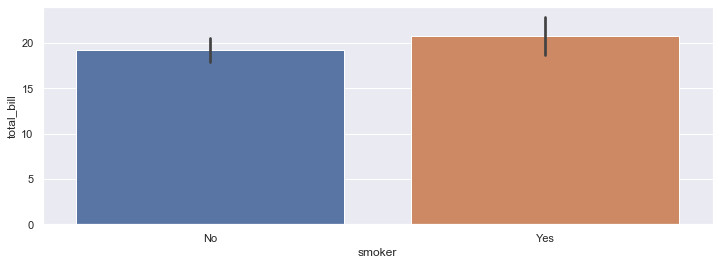

In [44]:
# Smoker Vs Total Bill
sns.barplot(x = "smoker", y = "total_bill", data =tips)

##### Barplot - Total Bill vs Days

From the below barplot you can clearly see that the total bill is higher on Saturday and Sunday, compared to the other 2 days. People tend to visit more on weekends.

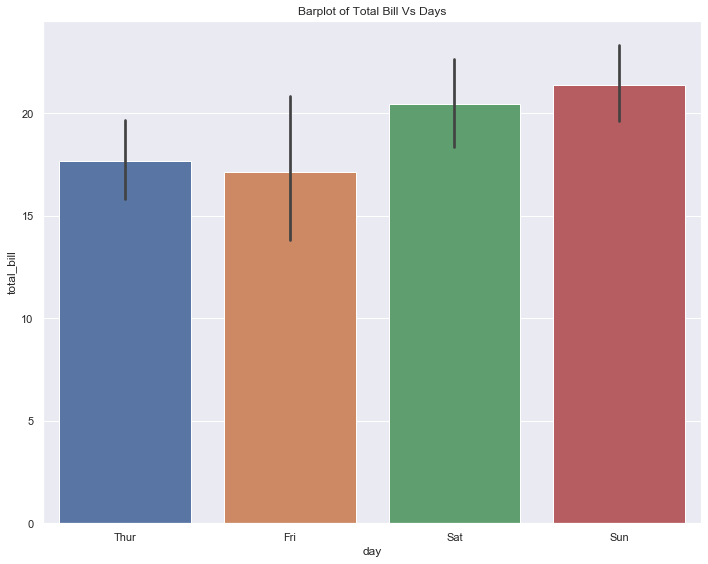

In [45]:
# Cross reference variables total bill versus days
# Lets find if there is more bill in Weekend or Weekdays
plt.figure(figsize=(10,8))
sns.barplot(tips.day, tips.total_bill, order=["Thur", "Fri", "Sat", "Sun"])
plt.title("Barplot of Total Bill Vs Days")

plt.tight_layout()
plt.show()

##### Line Plot - Tip and Size group

This draws a line plot with possibility of several semantic groupings.

The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters. These parameters control what visual semantics are used to identify the different subsets. [29]

In the below case, clearly, the tip increases with the increase in the group size.

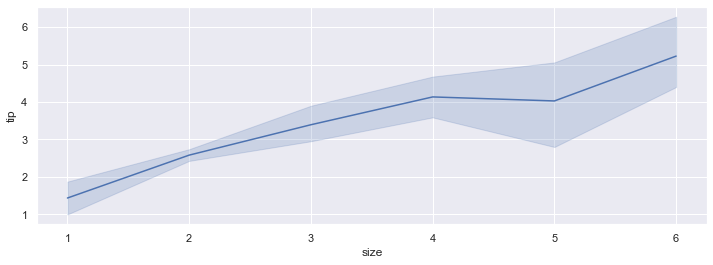

In [46]:
sns.lineplot(x="size", y="tip",data=tips)

##### Pairplot - plots pair wise relationship between variables

A Pairplot essentially plots pair wise relationship between variables. It supports “hue” as coloring the plot using categorical variables.

In below example, the diagonal part shows the distplot or histogram with kernel density estimation. The upper and lower part of the Pairplot shows the scatterplot. The “hue” colours the plot using categorical columns.

hue = “sex” — It will color the plot gender wise.

palette = “Set2” is a type of color combination used to color the plot. More details about the palette can see be seen under the link:

__[Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)__

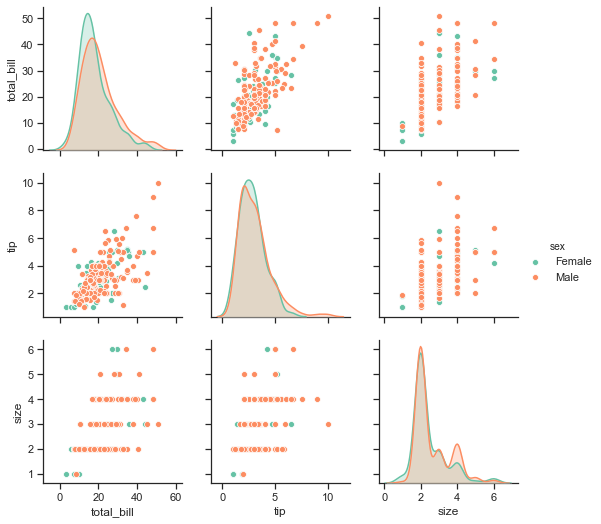

In [47]:
# Pairplot of Tips dataset
# This  will color the plot gender wise

sns.set(style="ticks")

sns.pairplot(tips, hue = "sex", palette="Set2")

##### Countplot - Day vs Group Size

Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. 

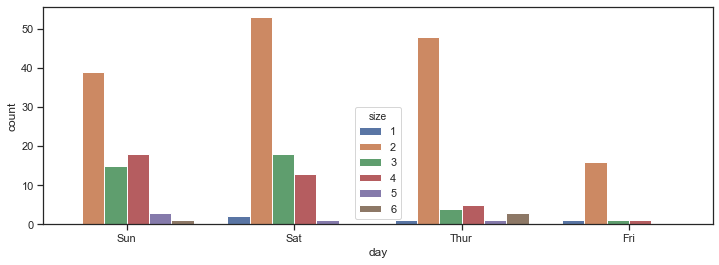

In [48]:
# Tables served per day and size
sns.countplot(x='day',hue='size', data=tips)

For all 4 days, a group size of just 2 people is by far the highest, followed by 3 and 4. Especially on Thursday this is very high.

##### Boxplot and Violin plots - visual representation of five point summary statistics of a given data set

Below I will mention some more types of plots you could use to analyze the Tips Dataset. I will not run actual code examples as such, and generate graphs.  I don't always find them helpful.

A Box Plot is a visual representation of five point summary statistics of a given data set. A five number summary includes:

    Minimum
    First Quartile
    Median (Second Quartile)
    Third Quartile
    Maximum
    
Also, a point worth noticing is that a boxplot is created for Categorical — Continuous Variables which means that if the x -axis is categorical and y axis is continuous then a boxplot or a violin plot should be created.

The violin plots are similar to the boxplots. The same can be seen in the image below.


![difference_boxplot_violinplot](difference_boxplot_violinplot.png)

##### LM Plot - total bill variable for the different days

The sns.lmplot is a plot that fits the regression line to the dataset showing as scatterplots. It follows the ordinary least square method and the line represents the best fit line. 

By the way, Seaborn doesn't have a dedicated scatter plot function, which is why you see a diagonal line. We actually used Seaborn's function for fitting and plotting a regression line.

Thankfully, each plotting function has several useful options that you can set. Here's how we can tweak the lmplot():

    We can set fit_reg=False to remove the regression line, since we only want a scatter plot.
    This hue argument is very useful because it allows you to express a third dimension of information using color.

In below it shows the linear regression fit of total_bill variable for the different days as shown in the plot legend. This is obtained using hue = “day” in sns.lmplot.

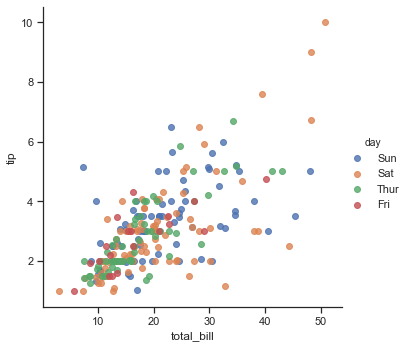

In [49]:
# LM PLot - Scatterplot arguments
# No regression line - fit_reg=False

sns.lmplot(x = "total_bill", y = "tip", data = tips, fit_reg=False, hue="day")

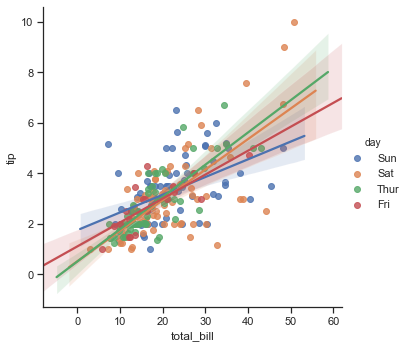

In [50]:
# LM PLot - Scatterplot arguments, with regression line

sns.lmplot(x = "total_bill", y = "tip", data = tips, hue="day")

### 3.2 Plotting Correlation Matrix Heatmap - follow up

For data scientists, checking correlations is an important part of the exploratory data analysis process. This analysis is one of the methods used to decide which features affect the target variable the most, and in turn, get used in predicting this target variable. In other words, it’s a commonly-used method for feature selection in machine learning.

And because visualization is generally easier to understand than reading tabular data, heatmaps are typically used to visualize correlation matrices. A simple way to plot a heatmap in Python is by importing and implementing the Seaborn library. 

Seaborn heatmaps are appealing to the eyes, and they tend to send clear messages about data almost immediately. This is why this method for correlation matrix visualization is widely used by data analysts and data scientists alike.

But what else can we get from the heatmap apart from a simple plot of the correlation matrix?

In two words: A LOT.

Surprisingly, the Seaborn heatmap function has 18 arguments that can be used to customize a correlation matrix, improving how fast insights can be derived. [20]

The heat map provides a matrix-like plot used to plot the degree of correlation between multiple numerical columns. The heatmap() function of the Seaborn library is used to plot heatmaps. The heatmap() function accepts a dataframe with columns as well as row headers. The tips dataset only contains column headers. To create row headers, you can use the corr() function, which returns the dataset with both column and row headers. You can then use the heatmap() function to plot the heatmap for the dataset as shown below. [27]

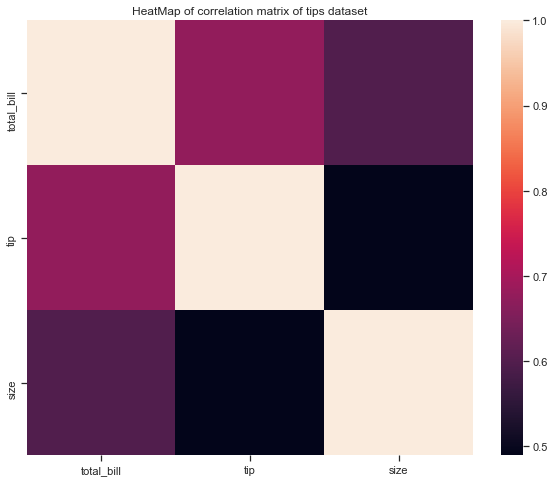

In [51]:
# Doing a basic correlation matrix of your data frame
# Hitting bug - matplotlib/seaborn: first and last row cut in half of heatmap plot [see references 22 and 23]
# Downgrade the package to 3.1.0 (matplotlib broke heatmaps)
plt.subplots(figsize=(10,8))
plt.title("HeatMap of correlation matrix of tips dataset")
sns.heatmap(tips.corr())

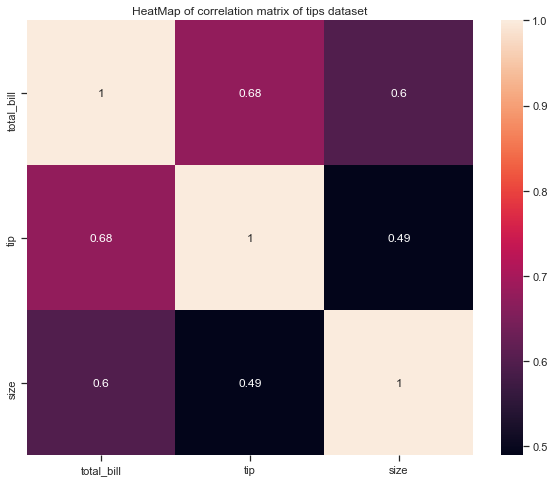

In [52]:
# And using the annotation argument
plt.subplots(figsize=(10,8))
plt.title("HeatMap of correlation matrix of tips dataset")
sns.heatmap(tips.corr(), annot=True)

While there is obviously a direct relationship between total_bill vs total_bill, tip vs tip, etc, all showing 1, below variables also show Correlation.

Variables With High Correlation:

    total_bill and tip -> 0.68

Variables With Medium Correlation:

    total_bill and size -> 0.6
    
Variables With Lower Correlation: 

    tip and size -> 0.49

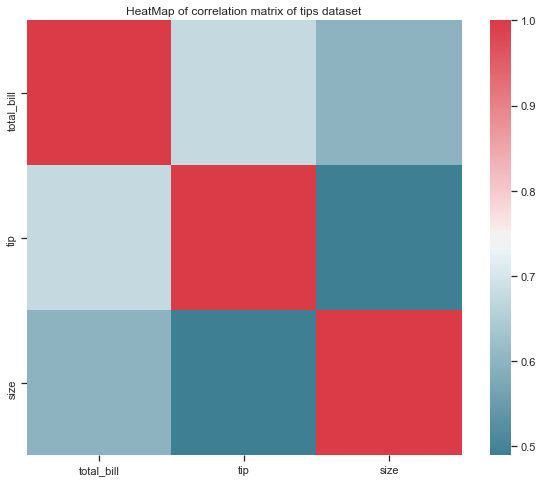

In [53]:
# Sns Heatmap [25] - another example coloured in this time
f, ax = plt.subplots(figsize=(10, 8))
corr = tips.corr()
plt.title("HeatMap of correlation matrix of tips dataset")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

##  Appendix - follow up in relation to Linear Regression, and Correlation Matrix plot. 

The Tips dataset contains non-numeric columns.
    

<div class="alert alert-block alert-info">
<b>Note:</b> One important thing to note when plotting a correlation matrix is that it completely ignores any non-numeric column. 
</div>


You could change it, so that all the category variable were changed to numeric variables (after data wrangling the DataFrame will look like this, see below screenshot). It allows you to be even more detailed in your analysis. [24]

![data_wrangling](data_wrangling.png)


It requires Data Cleaning & Feature Engineering:

    Changing the data types
    Checking the categories to a dummy variable so as to get only numeric values
    

The same is explained in this article - Linear Regression example [30]:

__[Python Machine Learning Example – Linear Regression](https://devarea.com/python-machine-learning-example-linear-regression/#.XdQuDtXgqUl)__

See section:

* Transform and clean the data

You have to rebuilt the model, and you need to convert all the text values into numbers. You can do it in many ways:

    Using update statements
    Using replace method
    Iterate over the rows
    Use dummy variables
    
Once the build is ready, so the dataset contains just numeric columns, you could split the data into test and train so you can test the model before you use it. 

It allows you to train the model. 

In [54]:
# Loading new copy csv into pandas dataframe
tips_amend = pd.read_csv('tips.csv', delimiter = ',')

In [55]:
# Using replace: convert sex and smoker columns to values
tips_amend.replace({ 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} ,inplace=True)

In [56]:
tips_amend.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


Using dummy variables:
* The values in day column are:  Thu, Fri, Sat, Sun we can convert it to 1, 2, 3, 4 but to get a good model, it is better to use boolean variables. We can achieve it by converting the column into 4 columns – one for each day with 0 or 1 as values. In pandas library it can be done using get_dummies.

In [57]:
days=pd.get_dummies(tips_amend['day'])
# days = days[['Thur', 'Fri','Sat','Sun']]
days.sample(5)

,Fri,Sat,Sun,Thur
108,0,1,0,0
203,0,0,0,1
136,0,0,0,1
219,0,1,0,0
78,0,0,0,1


Actually we can drop one of the columns without loosing data – for example if we drop column ‘Fri’ we know that index 91 is Fri because all other days are 0. It is also supported by the same function.

In [58]:
days=pd.get_dummies(tips_amend['day'],drop_first=True)
days.sample(6)

,Sat,Sun,Thur
4,0,1,0
216,1,0,0
180,0,1,0
147,0,0,1
95,0,0,0
142,0,0,1


Do the same with time column and concat all data frames, Also we don’t need the day and size columns anymore so we drop them.

In [59]:
# days=pd.get_dummies(tips_amend['day'],drop_first=True)
tips_amend = pd.concat([tips_amend,days],axis=1)
times=pd.get_dummies(tips_amend['time'],drop_first=True)
tips_amend = pd.concat([tips_amend,times],axis=1)
tips_amend.drop(['day','time'],inplace=True,axis=1)
tips_amend.head()

,total_bill,tip,sex,smoker,size,Sat,Sun,Thur,Lunch
0,16.99,1.01,1,0,2,0,1,0,0
1,10.34,1.66,0,0,3,0,1,0,0
2,21.01,3.50,0,0,3,0,1,0,0
3,23.68,3.31,0,0,2,0,1,0,0
4,24.59,3.61,1,0,4,0,1,0,0


#### Building our Machine Learning model

Now we are ready to build the linear regression model:

We create a list of features as X and predicted as Y.

In [60]:
X = tips_amend[['sex','smoker','size','Sat','Sun','Thur','Lunch']]
Y = tips_amend[['tip']]

Now lets split the data into test and train so we can test our model before we use it – we decide to split 70% – 30%.

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=26)

Now lets train the model with X_train and y_train.

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
# And predict the X_test values
predictions=model.predict(X_test)

We can now look at the predictions and compare it with y_test.

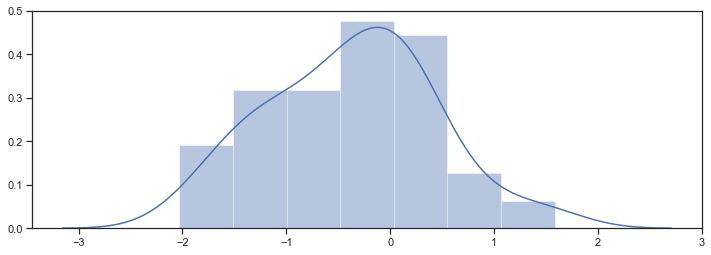

In [64]:
# We can draw a graph to see the difference distribution
sns.distplot(y_test-predictions)

From above, we can see from the graph that most of the times the predictions were correct (difference = 0). We can continue working on the model, adding data and play with the parameters.

If we want to predict new value for example:

We have a 3 size table smoker male on Saturday lunch.

In [65]:
# { 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}
myvals = np.array([0,1,3,1,0,0,0]).reshape(1,-1)

In [66]:
tips_amend.head()

,total_bill,tip,sex,smoker,size,Sat,Sun,Thur,Lunch
0,16.99,1.01,1,0,2,0,1,0,0
1,10.34,1.66,0,0,3,0,1,0,0
2,21.01,3.50,0,0,3,0,1,0,0
3,23.68,3.31,0,0,2,0,1,0,0
4,24.59,3.61,1,0,4,0,1,0,0


So the tip for 3 size table smoker male at Saturday lunch time, is expected to be $3.63.

In [68]:
model.predict(myvals)

array([[3.63330971]])

## References

[1] Python Software Foundation. Welcome to python.org.
https://www.python.org/.

[2] GMIT. Quality assurance framework.
https://www.gmit.ie/general/quality-assurance-framework.

[3] GitHub Guides. Mastering markdown.
https://guides.github.com/features/mastering-markdown/.

[4] Project Jupyter. Project jupyter.
https://jupyter.org/.

[5] Michael Waskom. seaborn.
https://seaborn.pydata.org/.

[6] Michael Waskom. Tips data set.
https://github.com/mwaskom/seaborn-data/blob/master/tips.csv.

[7] Seaborn

https://anaconda.org/anaconda/seaborn

[8] Anaconda

https://docs.anaconda.com/anaconda/

[9] Python

https://www.python.org/downloads/

[10] Cmder software

https://cmder.net/

[11] https://stackoverflow.com/questions/30336324/seaborn-load-dataset

[12] https://stackoverflow.com/questions/43422692/loading-web-data-file-to-pandas-dataframe

[13] https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/

[14] https://www.kaggle.com/ssouhassou/data-viz-a-modest-essay-on-the-dataset-tips

[15] https://www.kaggle.com/ranjeetjain3/different-types-of-charts

[16] https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset

[17] https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e

[18] https://stackoverflow.com/questions/36964155/what-is-the-statistical-significance-of-pandas-describe-function-and-how-to-use

[19] https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib

[20] https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07

[21] https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger

[22]  https://datascience.stackexchange.com/questions/57245/seaborn-heatmap-not-displaying-correctly

[23] https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

[24] https://github.com/anitaokoh/Understanding-the-Seaborn-heatmap-function/blob/master/dissecting_heatmap.ipynb

[25] https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

[26] https://medium.com/@mukul.mschauhan/data-visualisation-using-seaborn-464b7c0e5122

[27] https://wellsr.com/python/seaborn-plots-for-python-data-visualization/

[28] https://analyticsindiamag.com/a-simple-introduction-to-pythons-seaborn-library/

[29] https://seaborn.pydata.org/generated/seaborn.lineplot.html

[30] https://devarea.com/python-machine-learning-example-linear-regression/#.XcG8INXgqUl

[31] https://code.visualstudio.com/

[32] NumPy developers. Numpy.

http://www.numpy.org/

[33] https://pandas.pydata.org/

[34] https://matplotlib.org/

[35] https://www.geeksforgeeks.org/python-pandas-dataframe-info/

[36] https://www.mathsisfun.com/data/univariate-bivariate.html

[37] Tipping in the USA Explained - Visit America (video)

https://www.youtube.com/watch?v=RoKL2T_48HU

[38] https://elitedatascience.com/python-seaborn-tutorial

[39] https://seaborn.pydata.org/generated/seaborn.relplot.html

[40] https://stackoverflow.com/questions/52385428/plot-point-markers-and-lines-in-different-hues-but-the-same-style-with-seaborn

[42] https://seaborn.pydata.org/tutorial/regression.html

[43] https://stackoverflow.com/questions/41968732/set-order-of-columns-in-pandas-dataframe

[44] https://www.ibm.com/support/knowledgecenter/en/SSGNPV_1.1.3/dsx/markd-jupyter.html

[45] https://medium.com/@bingobee01/pandas-tricks-and-tips-a7b87c3748ea